## Data science bootcamp - Week 3 - Navdeep Mugathihalli Kumaregowda - nm4686

## HW Questions:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df = df.sort_values(by='hour_beginning').reset_index(drop=True)

df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

/tmp/ipython-input-3751455580.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
/tmp/ipython-input-3751455580.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'] = df['temperature'].fillna(method="ffill")
/tmp/ipython-input-3751455580.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['precipitation'] = df['precipitation'].fillna(method="ffill")
/tmp/ipython-input-3751455580.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


###1.Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

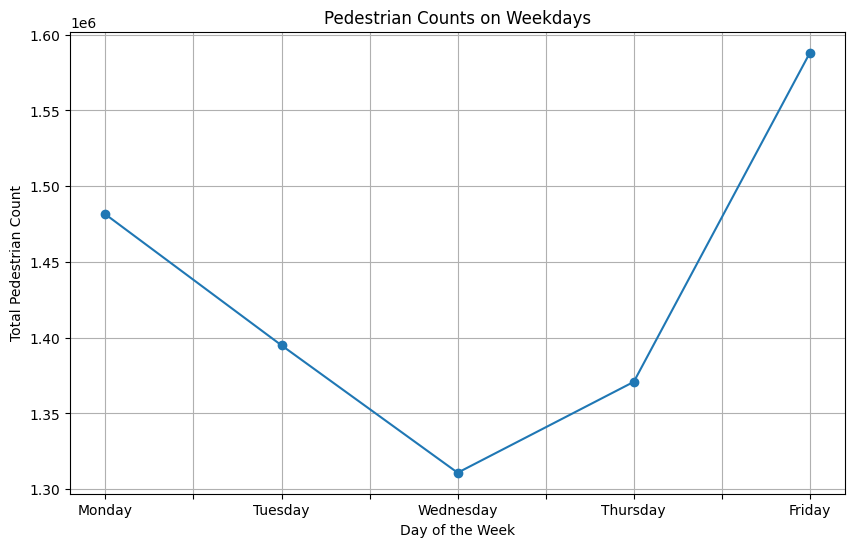

In [2]:

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_df = df[df['day_name'].isin(weekdays)]


weekday_counts = weekday_df.groupby('day_name')['Pedestrians'].sum().reindex(weekdays)


plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o')
plt.title('Pedestrian Counts on Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

###2.Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

Pedestrian Counts by Weather Summary (2019):
 weather_summary
partly-cloudy-day      2790868
clear-day              1953025
cloudy                  984879
rain                    139502
partly-cloudy-night      63800
clear-night              61825
snow                      8460
fog                       4673
wind                      2716
sleet                     1426
Name: Pedestrians, dtype: int64


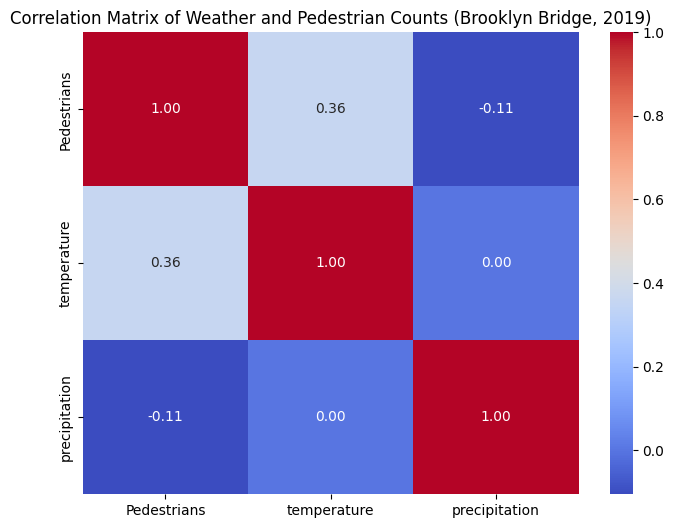

In [3]:

df['year'] = df['hour_beginning'].dt.year
brooklyn_bridge_2019_df = df[(df['location'] == 'Brooklyn Bridge') & (df['year'] == 2019)]

weather_counts = brooklyn_bridge_2019_df.groupby('weather_summary')['Pedestrians'].sum().sort_values(ascending=False)
print("Pedestrian Counts by Weather Summary (2019):\n", weather_counts)

correlation_matrix = brooklyn_bridge_2019_df[['Pedestrians', 'temperature', 'precipitation']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather and Pedestrian Counts (Brooklyn Bridge, 2019)')
plt.show()

###3.Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

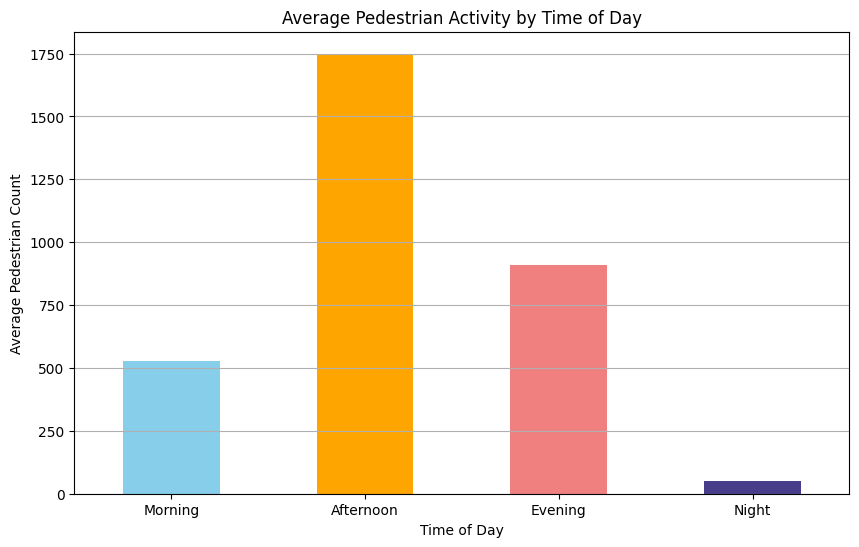

In [4]:

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(get_time_of_day)

time_of_day_analysis = df.groupby('time_of_day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])


plt.figure(figsize=(10, 6))
time_of_day_analysis.plot(kind='bar', color=['skyblue', 'orange', 'lightcoral', 'darkslateblue'])
plt.title('Average Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()